---

# Ensembles of models

In this assignment, we will consider the application of some classical and well-proven ensemble algorithms. We will demonstrate the work of these algorithms using electricity consumption dataset.

# Dataset description

**Author**: M. Harries, J. Gama, A. Bifet  
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009  
**Please cite**: None  

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends). 

The data was normalized by A. Bifet.

### Attribute information  
* Date: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1
* Day: day of the week (1-7)
* Period: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1
* NSWprice: New South Wales electricity price, normalized between 0 and 1
* NSWdemand: New South Wales electricity demand, normalized between 0 and 1
* VICprice: Victoria electricity price, normalized between 0 and 1
* VICdemand: Victoria electricity demand, normalized between 0 and 1
* transfer: scheduled electricity transfer between both states, normalized between 0 and 1

### Relevant papers  
M. Harries. Splice-2 comparative evaluation: Electricity pricing. Technical report, The University of South Wales, 1999.  
J. Gama, P. Medas, G. Castillo, and P. Rodrigues. Learning with drift detection. In SBIA Brazilian Symposium on Artificial Intelligence, pages 286–295, 2004.

# Exploratory data analysis

Read the dataset into a dataframe

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('electricity_train.csv')
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.425556,6,0.723404,0.076258,0.311366,0.003467,0.422915,0.414912,1
1,0.867351,7,0.808511,0.028131,0.299018,0.001838,0.325738,0.832018,0
2,0.031680,1,0.723404,0.055242,0.398691,0.003467,0.422915,0.414912,0
3,0.867793,3,1.000000,0.028822,0.396162,0.001014,0.394873,0.639474,0
4,0.880536,4,0.978723,0.040741,0.468908,0.002655,0.425427,0.630702,1


Use the <code>.describe()</code> method to explore the dataset "from a bird's eye view".

In [2]:
df.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
count,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000
mean,0.498293,4.006566,0.500560,0.057828,0.425939,0.003455,0.423024,0.500243,0.424536
std,0.339907,1.993551,0.294998,0.039052,0.163390,0.010175,0.120600,0.153098,0.494279
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031945,2.000000,0.255319,0.035187,0.309729,0.002283,0.373382,0.414912,0.000000
50%,0.456263,4.000000,0.510638,0.048787,0.444213,0.003467,0.422915,0.414912,0.000000
75%,0.880492,6.000000,0.765957,0.074457,0.536745,0.003467,0.468669,0.605263,1.000000
max,1.000000,7.000000,1.000000,1.000000,0.980809,1.000000,1.000000,0.959211,1.000000


Make sure there are no missing values. It makes sense to check the balance of classes. Enter the proportion of elements of the class $1$.

In [ ]:
# < ENTER YOUR CODE HERE > 

Construct a correlation matrix. Identify the pair of most correlated features.

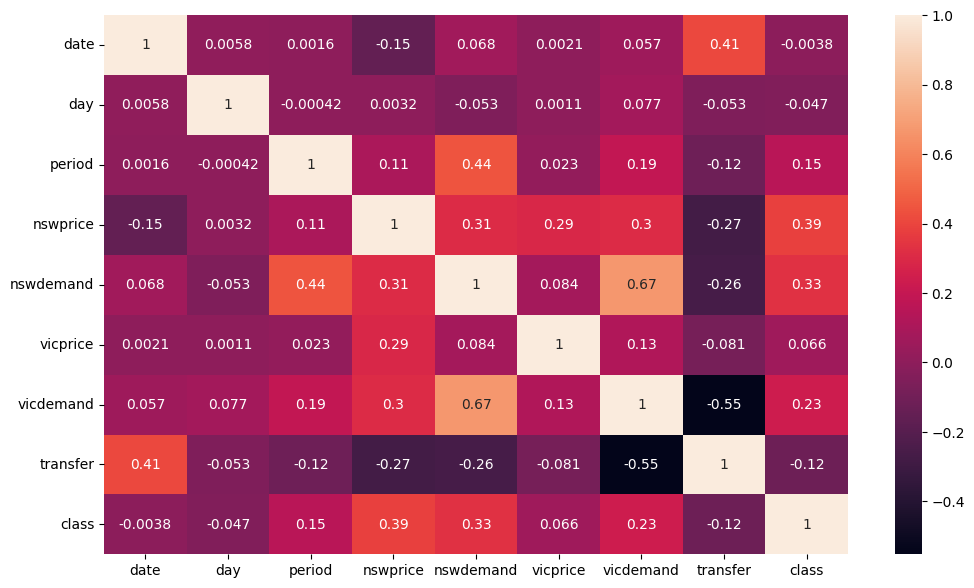

In [10]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

Construct histograms of the distributions of the features.

In [ ]:
# < ENTER YOUR CODE HERE > 

From the resulting illustrations, we can see that there is probably some periodicity in the data, as expected. Moreover, it seems that the missing values and outlier processing has already been done for us.

Use <code>train_test_split</code> to split the resulting dataset into training and test samples with the parameters specified in your individual assignment.

In [ ]:
# < ENTER YOUR CODE HERE > 

# Random Forests Classifier

Train the <code>sklearn.ensemble.RandomForestClassifier</code> model on the training dataset with the parameters specified in your individual assignment.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

random_state = 7

X_train, X_test, y_train, y_test = train_test_split(df.drop(['class'], axis =1), df['class'],test_size = 0.2, random_state = random_state)
print(len(X_train))
print(len(X_test))


forest_clf = RandomForestClassifier(random_state = random_state)
forest_clf.fit(X_train, y_train)

28999
7250


RandomForestClassifier(random_state=7)

Build the <code>classification_report</code> of the resulting model on **training dataset**. Enter the accuracy of the model on the **training dataset**.

In [36]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

def accuracy_and_conf_matrix(model, y_true, inputs):
    y_pred = model.predict(inputs)
    accuracy= accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, conf_matrix

def class_report(model, y_true, inputs):
    y_pred = model.predict(inputs)
    report = classification_report(y_true, y_pred)
    return report


accuracy, conf_matrix = accuracy_and_conf_matrix(forest_clf, y_train, X_train)

print(accuracy)
print(conf_matrix) 

1.0
[[16705     0]
 [    0 12294]]


We got overfitting. Well, once again, we can answer that decision trees are quite prone to overtraining.

## Adding GridSearchCV to the Random Forest.

Using the <code>sklearn.model_selection.GridSearchCV</code>, train <code>RandomForestClassifier</code> on training dataset with the parameters specified in your individual assignment.

In [37]:
from sklearn.model_selection import GridSearchCV

params_grid = {'n_estimators': [100,300,500],
  'max_leaf_nodes': list(range(6,10)),
  'min_samples_leaf': [1,2,3]}

grid_search =GridSearchCV(RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    n_jobs=-1,
    max_features='sqrt',
    random_state=7),
    params_grid,
    verbose=4,
    cv=3)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.765 total time=   0.4s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.777 total time=   0.5s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.776 total time=   0.4s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.769 total time=   1.3s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.776 total time=   1.3s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.776 total time=   1.3s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.770 total time=   2.4s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.777 total time=   2.5s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.776 total time=   2.4s
[CV 1/3] END max_leaf_nodes=6

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=7),
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

Select the best model. We recommend using the field <code>best_estimator_</code> of the <code>grid_search</code> class object. We can find the parameters of the best model in the field <code>best_params_</code> of this object.

In [42]:
grid_search.best_estimator_

grid_search.best_params_

{'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'n_estimators': 100}

Build the <code>classification_report</code> of the resulting model on the **training dataset**.
Enter the model accuracy on the **training dataset**.

In [44]:
forest_best = grid_search.best_estimator_
accuracy, conf_matrix = accuracy_and_conf_matrix(forest_best, y_train, X_train)
print(round(accuracy,3))
print(conf_matrix)

0.788
[[14520  2185]
 [ 3971  8323]]


Build the <code>classification_report</code> of the resulting model on the **test dataset**.
Enter the model accuracy on the **test dataset**.

In [46]:
forest_best = grid_search.best_estimator_
accuracy, conf_matrix = accuracy_and_conf_matrix(forest_best, y_test, X_test)
print(accuracy)
print(conf_matrix)

0.7857931034482759
[[3591  564]
 [ 989 2106]]


Overfitting has been avoided, but accuracy seems low.

One of the advantages of random forest is that you can look at the importance of features when classifying (inverse problem). Importance values can be found in the field <code>feature_importances_</code> of the model. Identify the name of the most important feature of the model.

In [67]:
print('most_valuable_feature', pd.DataFrame(forest_best.feature_importances_, columns=['Feature Importance'], index=X_train.columns).sort_values(by='Feature Importance'))


most_valuable_feature            Feature Importance
day                  0.011192
transfer             0.012311
vicdemand            0.033951
date                 0.057196
period               0.115894
nswdemand            0.126233
vicprice             0.153026
nswprice             0.490197


Let's try to improve the results by using other types of ensembles.

# Voting Classifier

Trains all models given as input and predicts the final result either by the greater number of identical answers that the models gave (hard), or calculates the probability of assigning objects to classes across all models and takes argmax.

Use an <code>sklearn.ensemble.VotingClassifier</code> object with the parameter <code>voting='hard'</code>. Use classifiers with the appropriate parameters specified in your individual assignment as base algorithms. Train the model on the training dataset.

In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression(solver ='liblinear', random_state = random_state)
sv_classifier = SVC(random_state = random_state)
sgd_classifier = SGDClassifier(random_state = random_state)

vot_classifier = VotingClassifier(
    estimators= [('log_reg', log_classifier),
                ('svc', sv_classifier),
                ('sgd', sgd_classifier)],
                voting = 'hard'
)

vot_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(random_state=7,
                                                 solver='liblinear')),
                             ('svc', SVC(random_state=7)),
                             ('sgd', SGDClassifier(random_state=7))])

Enter the model accuracy on the **training dataset**.

In [49]:
accuracy, conf_matrix = accuracy_and_conf_matrix(vot_classifier, y_train, X_train)
print(accuracy)
print(conf_matrix)

0.7533708058898583
[[14954  1751]
 [ 5401  6893]]


Enter the model accuracy on the **test dataset**.

In [50]:
accuracy, conf_matrix = accuracy_and_conf_matrix(vot_classifier, y_test, X_test)
print(accuracy)
print(conf_matrix)

0.7496551724137931
[[3700  455]
 [1360 1735]]


# Bagging Classifier

Creates multiple objects of the same class (multiple models) and trains them on non-overlapping subsets of the training dataset, and further averages the predictions.

Based on <code>sklearn.ensemble.BaggingClassifier</code>, using <code>DecisionTreeClassifier</code> train the model on the training dataset with the parameters specified in your individual assignment.

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_classifier = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, 
    max_features=0.5,
    bootstrap=False,
  random_state=7)

bag_classifier.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.5, random_state=7)

Enter the model accuracy on the **training dataset**.

In [52]:
accuracy, conf_matrix = accuracy_and_conf_matrix(bag_classifier, y_train, X_train)
print(accuracy)
print(conf_matrix)

0.9799993103210456
[[16585   120]
 [  460 11834]]


Enter the model accuracy on the **test dataset**.

In [53]:
accuracy, conf_matrix = accuracy_and_conf_matrix(bag_classifier, y_test, X_test)
print(accuracy)
print(conf_matrix)

0.8558620689655172
[[3830  325]
 [ 720 2375]]


# Gradient Boosting Classifier

Gradient boosting works like this: several objects of a class (several models) are created, they are chained so that each next one tries to correct the errors of the previous one. Prone to overlearning.

Train a model based on <code>sklearn.ensemble.GradientBoostingClassifier</code> on training dataset with the parameters specified in your individual assignment.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(
    n_estimators=500, 
    learning_rate=0.8, 
    random_state=7, 
    max_depth=2)

grad_boost_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=7)

Enter the model accuracy on the **training dataset**.

In [56]:
accuracy, conf_matrix = accuracy_and_conf_matrix(grad_boost_clf, y_train, X_train)
print(accuracy)
print(conf_matrix)

0.9305148453394945
[[15760   945]
 [ 1070 11224]]


Enter the model accuracy on the **test dataset**.

In [57]:
accuracy, conf_matrix = accuracy_and_conf_matrix(grad_boost_clf, y_test, X_test)
print(accuracy)
print(conf_matrix)

0.9026206896551724
[[3819  336]
 [ 370 2725]]


# AdaBoost Classifier

It works in a similar way to gradient boosting, however subsequent models do not try to correct the error of the previous ones: the first object is trained on the entire dataset, and the next one updates its weights based on the experience of the previous one in a way that corrects erroneous predictions.

Based on <code>sklearn.ensemble.AdaBoostClassifier</code>, using <code>DecisionTreeClassifier</code>, train the model with the parameters specified in your individual assignment on the training dataset.

In [58]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5,
    random_state=7
)

ada_boost.fit(X_train, y_train)


C:\Users\abdur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300, random_state=7)

Enter the model accuracy on the **training dataset**.

In [60]:
accuracy, conf_matrix = accuracy_and_conf_matrix(ada_boost, y_train, X_train)
print(accuracy)
print(conf_matrix)

0.9422049036173661
[[15672  1033]
 [  643 11651]]


Enter the model accuracy on the **test dataset**.

In [59]:
accuracy, conf_matrix = accuracy_and_conf_matrix(ada_boost, y_test, X_test)
print(accuracy)
print(conf_matrix)

0.9009655172413793
[[3741  414]
 [ 304 2791]]


# Stacking Classifier

Trains multiple class objects (multiple models) on the entire dataset, and then trains a separate classifier on the metdata - the predictions obtained by the previously trained models.

Use the <code>sklearn.ensemble.StackingClassifier</code> object. The basic algorithms and solver, as well as the corresponding parameters, are specified in your individual assignment. Train the model on the training dataset.

In [64]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

base_estimators = [
    ('rand', RandomForestClassifier(random_state = 7)),
    ('svc', SVC(random_state = 7))
]

final_estimator = LogisticRegression(random_state = 7)

stc_boost = StackingClassifier(
    estimators = base_estimators, final_estimator = final_estimator
)

stc_boost.fit(X_train, y_train)

StackingClassifier(estimators=[('rand', RandomForestClassifier(random_state=7)),
                               ('svc', SVC(random_state=7))],
                   final_estimator=LogisticRegression(random_state=7))

Enter the model accuracy on the **training dataset**.

In [65]:
accuracy, conf_matrix = accuracy_and_conf_matrix(stc_boost, y_train, X_train)
print(accuracy)
print(conf_matrix)

0.9997586123659437
[[16705     0]
 [    7 12287]]


Enter the model accuracy on the **test dataset**.

In [66]:
accuracy, conf_matrix = accuracy_and_conf_matrix(stc_boost, y_test, X_test)
print(accuracy)
print(conf_matrix)

0.9075862068965517
[[3841  314]
 [ 356 2739]]
